# S50F-DNN ฺฺEarlyStop & Generalization


Baseline Neural Network Model Performance

In [19]:
xseed=1982

from numpy.random import seed
seed(xseed)
from tensorflow import set_random_seed
set_random_seed(xseed)


In [20]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [21]:
 # Binary Classification with Sonar Dataset: Baseline
import numpy
import pandas


from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from keras.layers import Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.constraints import maxnorm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from keras.callbacks import LearningRateScheduler

import joblib

import os
from datetime import datetime

import matplotlib.pyplot as pyplot

In [22]:
train_st='2007'
train_end='2018'

test_st='2019'
test_end='2020'

strategyName='long'

if strategyName=='long' :
 filename='ML-Long_S50M15_07To1Q20-Train.csv'
 filepath=os.path.abspath(f'D:\\Dev-Trong\\DataSet\\{filename}')
else:
  filename='ML-Short_S50M15_07To1Q20-Train_V2.csv'
  filepath=os.path.abspath(f'D:\\Dev-Trong\\DataSet\\short_v2\\{filename}')

print(filepath)


D:\Dev-Trong\DataSet\ML-Long_S50M15_07To1Q20-Train.csv


In [23]:
def CreateData(dfx,labelCol):
 
 X_df_temp =dfx.drop(columns=['open','high','low','close',labelCol])
 Y_df_temp = dfx[labelCol]

 Xtemp=X_df_temp.to_numpy()
 ytemp=Y_df_temp.to_numpy()

 return X_df_temp,Y_df_temp, Xtemp,ytemp

In [35]:
def PlotModelEvaluation(histModel): 
 pyplot.figure(figsize=(12,8))

 # plot loss learning curves
 pyplot.subplot(211)
 pyplot.title('Cross-Entropy Loss', pad=-40)
 pyplot.plot(histModel.history['loss'], label='train')
 pyplot.plot(histModel.history['val_loss'], label='test')
 pyplot.legend()

# plot accuracy learning curves
 pyplot.subplot(212)
 pyplot.title('Accuracy', pad=-40)
 pyplot.plot(histModel.history['accuracy'], label='train')
 pyplot.plot(histModel.history['val_accuracy'], label='test')
 pyplot.legend()

 pyplot.show()


In [24]:
# load dataset

dataframe = pandas.read_csv(filepath,index_col="datetime", parse_dates=['datetime'],dayfirst=True)

print(dataframe.info())
dataframe.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69679 entries, 2007-01-03 09:45:00 to 2020-03-31 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    69679 non-null  float64
 1   high                    69679 non-null  float64
 2   low                     69679 non-null  float64
 3   close                   69679 non-null  float64
 4   indy_ma-550             69679 non-null  float64
 5   indy_ma-1100            69679 non-null  float64
 6   indy_hh-550             69679 non-null  float64
 7   indy_ll-550             69679 non-null  float64
 8   indy_mid-550            69679 non-null  float64
 9   indy_hh2-1100           69679 non-null  float64
 10  indy_ll2-1100           69679 non-null  float64
 11  indy_mid2-1100          69679 non-null  float64
 12  indy_macd110-440        69679 non-null  float64
 13  indy_signal110-440-110  69679 non-null  float64
 14  ind

(69679, 22)

In [25]:
labelName=dataframe.columns[-1]
print('Lable Column: ',labelName)

Lable Column:  LongSignal


# Train Data

In [26]:
df=dataframe[train_st:train_end]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62855 entries, 2007-01-03 09:45:00 to 2018-12-28 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    62855 non-null  float64
 1   high                    62855 non-null  float64
 2   low                     62855 non-null  float64
 3   close                   62855 non-null  float64
 4   indy_ma-550             62855 non-null  float64
 5   indy_ma-1100            62855 non-null  float64
 6   indy_hh-550             62855 non-null  float64
 7   indy_ll-550             62855 non-null  float64
 8   indy_mid-550            62855 non-null  float64
 9   indy_hh2-1100           62855 non-null  float64
 10  indy_ll2-1100           62855 non-null  float64
 11  indy_mid2-1100          62855 non-null  float64
 12  indy_macd110-440        62855 non-null  float64
 13  indy_signal110-440-110  62855 non-null  float64
 14  ind

# Test Data

In [27]:
df_test=dataframe[test_st:test_end]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6824 entries, 2019-01-02 09:45:00 to 2020-03-31 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    6824 non-null   float64
 1   high                    6824 non-null   float64
 2   low                     6824 non-null   float64
 3   close                   6824 non-null   float64
 4   indy_ma-550             6824 non-null   float64
 5   indy_ma-1100            6824 non-null   float64
 6   indy_hh-550             6824 non-null   float64
 7   indy_ll-550             6824 non-null   float64
 8   indy_mid-550            6824 non-null   float64
 9   indy_hh2-1100           6824 non-null   float64
 10  indy_ll2-1100           6824 non-null   float64
 11  indy_mid2-1100          6824 non-null   float64
 12  indy_macd110-440        6824 non-null   float64
 13  indy_signal110-440-110  6824 non-null   float64
 14  indy

In [28]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=xseed)

X_df,y_df,X_train,y_train=CreateData(df,labelName)
Xtest_df,ytest_df,X_test,y_test=CreateData(df_test,labelName)

# Show Data

In [29]:
print(y_df.tail(3))
print(ytest_df.tail(3))

#print(y_train[:10])
#print(y_test[:10])

display('X_df.tail(3)','Xtest_df.tail(3)')

datetime
2018-12-28 16:15:00    0
2018-12-28 16:30:00    0
2018-12-28 16:45:00    0
Name: LongSignal, dtype: int64
datetime
2020-03-31 16:15:00    0
2020-03-31 16:30:00    0
2020-03-31 16:45:00    0
Name: LongSignal, dtype: int64


,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2018-12-28 16:15:00,1076.66,1085.30,1123.2,1022.6,1072.9,1125.0,1022.6,1073.8,-29.61,-24.48,-5.13,43.43,1051.53,1,0,3,2
2018-12-28 16:30:00,1076.60,1085.23,1123.2,1022.6,1072.9,1125.0,1022.6,1073.8,-29.75,-24.56,-5.19,43.98,1050.89,1,0,3,2
2018-12-28 16:45:00,1076.53,1085.16,1123.2,1022.6,1072.9,1125.0,1022.6,1073.8,-29.81,-24.64,-5.17,44.65,1049.59,1,0,3,2
,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2020-03-31 16:15:00,797.37,909.22,969.7,623.0,796.35,1070.3,623.0,846.65,-34.58,-74.34,39.77,55.60,717.94,1,0,4,3
2020-03-31 16:30:00,796.96,908.92,969.7,623.0,796.35,1070.3,623.0,846.65,-33.73,-73.60,39.87,55.66,718.11,1,0,4,3
2020-03-31 16:45:00,796.55,908.62,968.6,623.0,795.80,1070.3,623.0,846.65,-32.84,-72.85,40.01,55.86,718.41,1,0,4,3


In [30]:
#scaler=StandardScaler().fit(X_train)
scaler=MinMaxScaler().fit(X_train)

Xtrain_scaled=scaler.transform(X_train)
Xtest_scaled=scaler.transform(X_test)


#print("After scaled train \n",Xtrain_scaled[:2])
#print("After scaled test \n",X_test[:2])



In [31]:
print("X-Train ",Xtrain_scaled.shape)

print("X-Test ",Xtest_scaled.shape)

print("y-Train ",y_train.shape)

print("y-Test ",y_test.shape)

X-Train  (62855, 17)
X-Test  (6824, 17)
y-Train  (62855,)
y-Test  (6824,)


# Model Defination

In [36]:

input_n=X_train.shape[1]
h1=input_n

xpoch=150
xbatch=32

patience_from_epoch=round( xpoch*0.5)

my_kernelInit='he_uniform'
#kernel_initializer='normal','he_uniform'



print("Input-N =",input_n)

print('HD#1 ',h1)

print('Epochs=',xpoch)
print('Batch_size=',xbatch)
print('Patience from epochs',patience_from_epoch )



Input-N = 17
HD#1  17
Epochs= 150
Batch_size= 32
Patience from epochs 75


In [287]:
def modelBased(h1,*hns):
 model = Sequential()  
  
 
 model.add(Dense(h1, input_dim=input_n, activation='relu' ))
 
 print(h1)

 if(len(hns)>0):
    for  hn in hns:
       model.add(Dense(hn,activation='relu'))
       print(hn) 
 

 model.add(Dense(1, activation='sigmoid'))
  

 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
 return model

In [16]:
def modelBased_InitKernel(h1,*hns):
 model = Sequential()  
  
 
 model.add(Dense(h1, input_dim=input_n, activation='relu',kernel_initializer=my_kernelInit ))
 
 print(h1)

 if(len(hns)>0):
    for  hn in hns:
       model.add(Dense(hn, kernel_initializer=my_kernelInit,activation='relu'))
       print(hn) 
 

 model.add(Dense(1, kernel_initializer=my_kernelInit, activation='sigmoid'))
  

 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
 return model


# Fit and Evaluate model

In [290]:

#model=modelBased(input_n,input_n)
model=modelBased_InitKernel(input_n,input_n)
    
model
    

17
17


In [291]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)
#es = EarlyStopping(monitor='val_loss', mode='min', verbosebaseline=0.4)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience_from_epoch)

#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=patience_from_epoch)



In [292]:
isSaveModel=False
modelName='BestModel_ForEarlyStop.h5'

if isSaveModel==False:
    print("Run at once")
    history_model=model.fit(Xtrain_scaled,y_train,validation_data=(Xtest_scaled,y_test),epochs=xpoch,batch_size=xbatch,callbacks=[es])
    
else:
    print("Apply ModelCheckpoin")
    mc = ModelCheckpoint(modelName, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    history_model=model.fit(Xtrain_scaled,y_train,validation_data=(Xtest_scaled,y_test),epochs=xpoch,batch_size=xbatch,callbacks=[es,mc])
    

Run at once
Train on 62855 samples, validate on 6824 samples
Epoch 1/150
62855/62855 [==============================] - 2s 35us/step - loss: 0.3717 - accuracy: 0.8417 - val_loss: 0.3907 - val_accuracy: 0.8139
Epoch 2/150
62855/62855 [==============================] - 2s 31us/step - loss: 0.3163 - accuracy: 0.8675 - val_loss: 0.3719 - val_accuracy: 0.8305
Epoch 3/150
62855/62855 [==============================] - 2s 32us/step - loss: 0.3023 - accuracy: 0.8751 - val_loss: 0.3486 - val_accuracy: 0.8453
Epoch 4/150
62855/62855 [==============================] - 2s 32us/step - loss: 0.2936 - accuracy: 0.8794 - val_loss: 0.3602 - val_accuracy: 0.8319
Epoch 5/150
62855/62855 [==============================] - 2s 32us/step - loss: 0.2871 - accuracy: 0.8822 - val_loss: 0.3673 - val_accuracy: 0.8463
Epoch 6/150
62855/62855 [==============================] - 2s 32us/step - loss: 0.2810 - accuracy: 0.8837 - val_loss: 0.4091 - val_accuracy: 0.8171
Epoch 7/150
62855/62855 [==========================

 Accuracy(%) train vs test:  93.73 - 80.86
 Loss(%) train vs test:  0.16 - 0.53


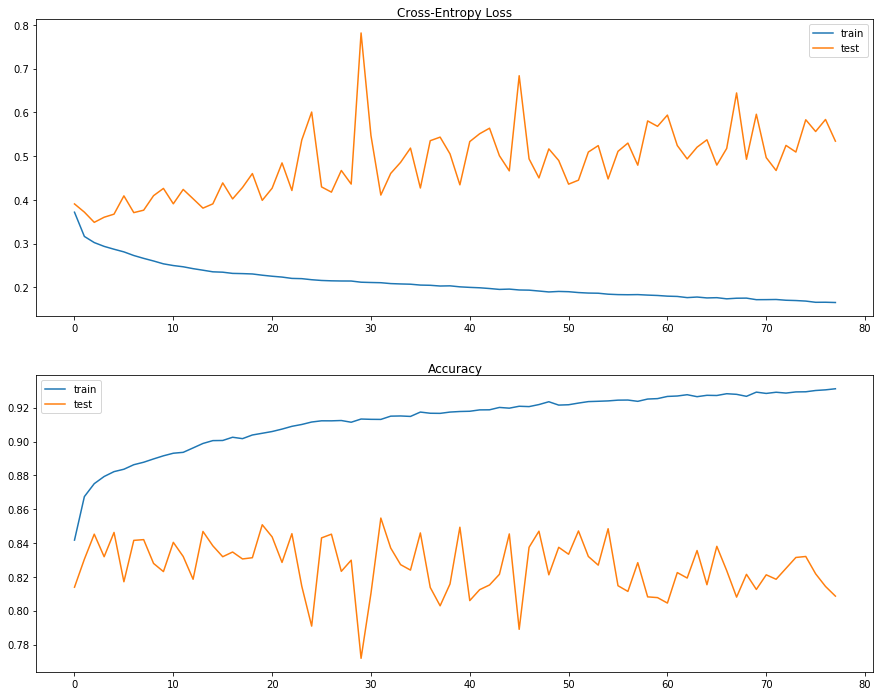

In [296]:
if isSaveModel==False:
    
 
 
 train_loss,train_acc=model.evaluate(Xtrain_scaled,y_train,verbose=0)
 test_loss,test_acc=model.evaluate(Xtest_scaled,y_test,verbose=0)

 print(' Accuracy(%) train vs test: ',round(train_acc*100,2),"-",round(test_acc*100,2))   
 print(' Loss(%) train vs test: ',round(train_loss,2),"-",round(test_loss,2))


 pyplot.figure(figsize=(15,12))

 # plot loss learning curves
 pyplot.subplot(211)
 pyplot.title('Cross-Entropy Loss', pad=-40)
 pyplot.plot(history_model.history['loss'], label='train')
 pyplot.plot(history_model.history['val_loss'], label='test')
 pyplot.legend()

# plot accuracy learning curves
 pyplot.subplot(212)
 pyplot.title('Accuracy', pad=-40)
 pyplot.plot(history_model.history['accuracy'], label='train')
 pyplot.plot(history_model.history['val_accuracy'], label='test')
 pyplot.legend()

 pyplot.show()

else:
   
   saved_model = load_model(modelName)
   # evaluate the model
   train_loss, train_acc = model.evaluate(Xtrain_scaled,y_train,verbose=1)
   test_loss, test_acc =model.evaluate(Xtest_scaled,y_test,verbose=1)
   print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    

# Tune L2 Wieght__regularizer Grid Search Regularization Hyperparameter

L2 =  0.1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Param: 0.100000, Train: 0.855, Test: 0.843
L2 =  0.01
Param: 0.010000, Train: 0.865, Test: 0.851
L2 =  0.001
Param: 0.001000, Train: 0.930, Test: 0.844
L2 =  0.0001
Param: 0.000100, Train: 0.950, Test: 0.827
L2 =  1e-05
Param: 0.000010, Train: 0.938, Test: 0.827
L2 =  1e-06
Param: 0.000001, Train: 0.953, Test: 0.821


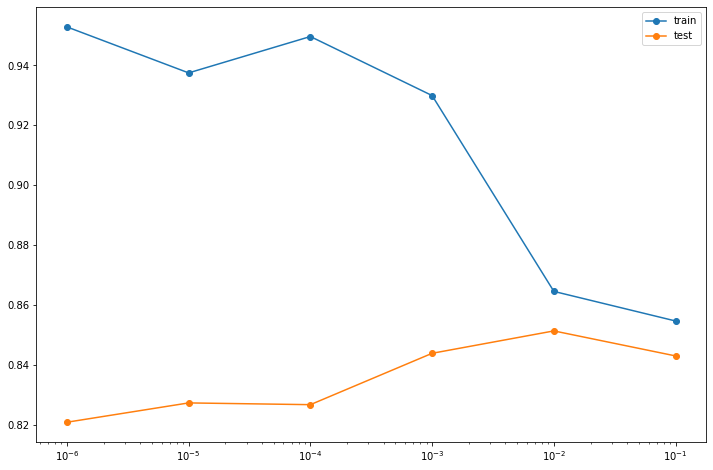

In [18]:
#model.fit(Xtrain_scaled,y_train,validation_data=(Xtest_scaled,y_test),epochs=xpoch,batch_size=xbatch,callbacks=[es])
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
    
    print('L2 = ',param)
    
    model_tuneL2 = Sequential() 
    
    model_tuneL2.add(Dense(h1, input_dim=input_n ,activation='relu',kernel_regularizer=l2(param) ))
    
    model_tuneL2.add(Dense(h1, activation='relu',kernel_regularizer=l2(param)))
    #model_tuneL2.add(Dense(xxxx, activation='relu',kernel_regularizer=l2(param)))
    
    model_tuneL2.add(Dense(1, activation='sigmoid'))
  

    model_tuneL2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    #==================================================Fit and evaluation===================================
    model_tuneL2.fit(Xtrain_scaled,y_train,epochs=xpoch,batch_size=xbatch,verbose=0)
    
    #evaluate the model
    _, train_acc = model_tuneL2.evaluate(Xtrain_scaled,y_train, verbose=0)
    _, test_acc = model_tuneL2.evaluate(Xtest_scaled,y_test, verbose=0)
    
    print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
    all_train.append(train_acc)
    all_test.append(test_acc)

# plot train and test means
pyplot.figure(figsize=(12,8))
pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()

# Tune L2 Dropout and Weight Constain Grid Search Regularization Hyperparameter

dropout param=  0.2
Param: 0.200000, Train: 0.656, Test: 0.698
dropout param=  0.3
Param: 0.300000, Train: 0.630, Test: 0.652
dropout param=  0.4
Param: 0.400000, Train: 0.801, Test: 0.680
dropout param=  0.5
Param: 0.500000, Train: 0.627, Test: 0.676
plot train and test dropout


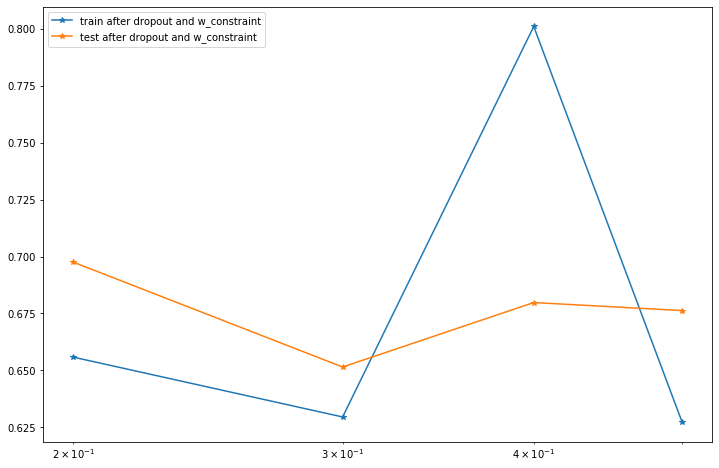

In [34]:
dropout_values = [0.2,0.3,0.4,0.5]
dropout_AllTrain, dropout_AllTest = list(), list()

# value 3-4
vaMaxNorm_WC=5

for param_dropout in dropout_values:
    
    print('dropout param= ',param_dropout)
    
    dropoutModel = Sequential()
    
    #input
    dropoutModel.add(Dropout(param_dropout, input_shape=(input_n,)))
    
    #layer#1
    dropoutModel.add(Dense(h1, activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC)))
    dropoutModel.add(Dropout(param_dropout))
    
    #layer#2
    dropoutModel.add(Dense(h1, activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC)))
    dropoutModel.add(Dropout(param_dropout))
    

    
    dropoutModel.add(Dense(1, activation="sigmoid"))
    
    dropoutModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    #==================================================Fit and evaluation===================================
    dropoutModel.fit(Xtrain_scaled,y_train,epochs=xpoch,batch_size=xbatch,verbose=0)
    
    #evaluate the model
    _, train_acc_dout = dropoutModel.evaluate(Xtrain_scaled,y_train, verbose=0)
    _, test_acc_dout = dropoutModel.evaluate(Xtest_scaled,y_test, verbose=0)
    
    print('Param: %f, Train: %.3f, Test: %.3f' % (param_dropout, train_acc_dout, test_acc_dout))
    dropout_AllTrain.append(train_acc_dout)
    dropout_AllTest.append(test_acc_dout)

print("plot train and test dropout")
pyplot.figure(figsize=(12,8))
pyplot.semilogx(dropout_values, dropout_AllTrain, label='train after dropout and w_constraint', marker='*')
pyplot.semilogx(dropout_values,dropout_AllTest, label='test after dropout and w_constraint', marker='*')
pyplot.legend()
pyplot.show()